In [1]:
from datetime import datetime as dt
import uuid 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
# sessions containing chat

c = pickle.load( open( "./chat_sessions.p", "rb" ) )

In [3]:
len(c.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


15874

In [4]:
# set of unique users who have made chat actions

chat_users = set(c.user)

In [5]:
len(chat_users)

8590

In [6]:
# all sessions

df = pickle.load( open( "./cleaned_dataset.p", "rb" ) )

In [7]:
# all users

total_users = set(df.user) 

In [8]:
len(total_users)

35889

In [11]:
# number of chat users / total number of users

len(chat_users) / len(total_users)

0.23934910418233998

In [12]:
# all sessions of users who have made chat actions

chatuser_sessions = df.groupby('UUID').filter(lambda g: (g.user.isin(chat_users)).any())

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


78348

In [14]:
# sessions from chat users that does not contain chat

n = chatuser_sessions.groupby('UUID').filter(lambda g: (g.action_cleaned != 'start_chat').all())

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
len(n.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


62474

In [16]:
len(n.groupby('UUID')) + len(c.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


78348

In [17]:
# ratio of chat sessions per all sessions of users who have made chat actions

len(c.groupby('UUID')) / len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


0.20260887323224588

In [18]:
# ratio of non-chat sessions per all sessions of users who have made chat actions

len(n.groupby('UUID')) / len(chatuser_sessions.groupby('UUID'))

/home/aksel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'UUID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


0.7973911267677541

In [37]:
# number of sessions per user in total dataset

num_sessions_user = df.groupby('user')['UUID'].nunique()

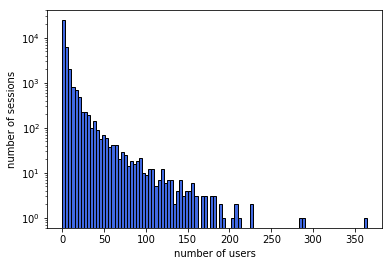

In [41]:
bins = np.linspace(0,num_sessions_user.values.max(),100)
n, bins, pathces = plt.hist(x=num_sessions_user.values,bins=bins,log=True,color='royalblue',edgecolor='black')
#plt.xticks(bins)
plt.xlabel('number of users')
plt.ylabel('number of sessions')

plt.savefig("img/num_sessions_per_user.pdf", bbox_inches='tight')
plt.show()

In [34]:
# number of sessions per user for users that have made a chat action

num_sessions_chat_user = chatuser_sessions.groupby('user')['UUID'].nunique()

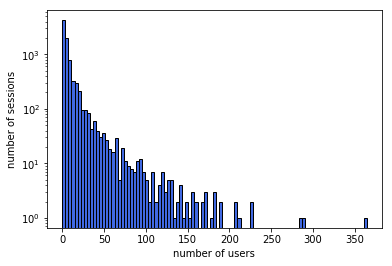

In [42]:
bins = np.linspace(0,num_sessions_chat_user.values.max(),100)
n, bins, pathces = plt.hist(x=num_sessions_chat_user.values,bins=bins,log=True,color='royalblue',edgecolor='black')
#plt.xticks(bins)
plt.xlabel('number of users')
plt.ylabel('number of sessions')

plt.savefig("img/num_sessions_per_chat_user.pdf", bbox_inches='tight')
plt.show()